# Modelation of ML models for Classification

In [25]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [26]:
train_dataset = pd.read_csv('data/train_dataset.csv')
test_dataset = pd.read_csv('data/test_dataset.csv')
val_dataset = pd.read_csv('data/val_dataset.csv')

In [27]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  4339 non-null   int64  
 1   Age                         4339 non-null   int64  
 2   AnnualIncome                4339 non-null   int64  
 3   CreditScore                 4339 non-null   int64  
 4   EmploymentStatus            4339 non-null   int64  
 5   EducationLevel              4339 non-null   int64  
 6   Experience                  4339 non-null   int64  
 7   LoanAmount                  4339 non-null   int64  
 8   LoanDuration                4339 non-null   int64  
 9   MaritalStatus               4339 non-null   int64  
 10  NumberOfDependents          4339 non-null   int64  
 11  HomeOwnershipStatus         4339 non-null   int64  
 12  MonthlyDebtPayments         4339 non-null   int64  
 13  CreditCardUtilizationRate   4339 

In [28]:
train_dataset.drop(columns=['Unnamed: 0','EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'CheckingAccountBalance',
 'JobTenure'], inplace=True)

In [32]:
scaler = MinMaxScaler()
scaler.fit(train_dataset.drop(columns='LoanApproved'))

X_train = scaler.transform(train_dataset.drop(columns='LoanApproved'))
Y_train = train_dataset['LoanApproved']


## Model & predictions

In [35]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [39]:
Y_predicted = model.predict(X_train)

### The Evaluation metrics in the trainee

In [40]:
accuracy = accuracy_score(Y_train, Y_predicted)
conf_matrix = confusion_matrix(Y_train, Y_predicted)
class_report = classification_report(Y_train, Y_predicted)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(f'Classification Report: \n {class_report}')


Accuracy: 0.9921640931090113
Confusion Matrix: 
 [[3293   11]
 [  23 1012]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3304
           1       0.99      0.98      0.98      1035

    accuracy                           0.99      4339
   macro avg       0.99      0.99      0.99      4339
weighted avg       0.99      0.99      0.99      4339



### The evaluation metrics in test

In [42]:
X_test = scaler.transform(test_dataset.drop(columns=['LoanApproved', 'Unnamed: 0','EmploymentStatus', 'MaritalStatus', 'NumberOfDependents',
 'CreditCardUtilizationRate', 'DebtToIncomeRatio', 'CheckingAccountBalance',
 'JobTenure']))
Y_test = test_dataset['LoanApproved']

Y_predicted_test = model.predict(X_test)

accuracy = accuracy_score(Y_test, Y_predicted_test)
conf_matrix = confusion_matrix(Y_test, Y_predicted_test)
class_report = classification_report(Y_test, Y_predicted_test)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n {conf_matrix}')
print(f'Classification Report: \n {class_report}')



Accuracy: 0.9930875576036866
Confusion Matrix: 
 [[2302    5]
 [  16  715]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      2307
           1       0.99      0.98      0.99       731

    accuracy                           0.99      3038
   macro avg       0.99      0.99      0.99      3038
weighted avg       0.99      0.99      0.99      3038



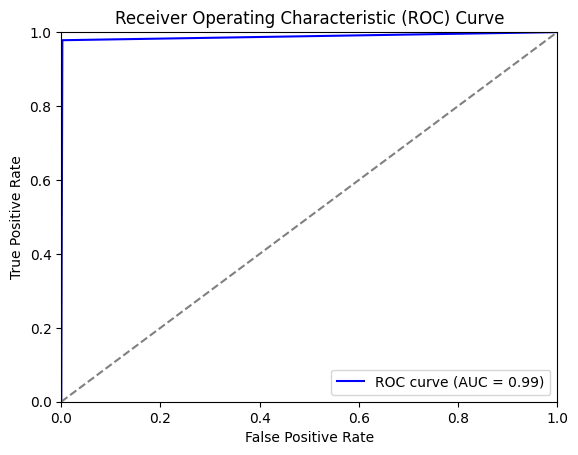

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades predichas para la clase positiva
fpr, tpr, _ = roc_curve(Y_test, Y_predicted_test)     # Calcular la curva ROC
auc = roc_auc_score(Y_test, Y_predicted_test)         # Calcular el AUC
plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


### Saving Model

In [43]:
import joblib

joblib.dump(model, 'models/Classification/model_99precision.pkl')
joblib.dump(scaler, 'models/Classification/model_99precision_scaler.pkl')

['models/Classification/model_99precision_scaler.pkl']